In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize']=10,7.5
plt.rcParams['axes.grid']=True
plt.gray()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.cluster import KMeans,DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
os.getcwd()

'C:\\Users\\user'

In [5]:
credit_sales=pd.read_csv('CREDIT CARD USERS DATA.csv')

In [6]:
credit_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(29), int64(101), object(2)
memory usage: 5.0+ MB


In [7]:
credit_sales.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.686200,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.426652,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,0.000000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,3.000000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,4.000000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.00000,5.000000,1.000000,79.000000,6.000000,23.000000,5.000000,6.0000,1.00000,52.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
credit_sales.head(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [9]:
dir(credit_sales)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__

In [10]:
credit_sales.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)

In [11]:
credit_sales.dtypes

custid          object
region           int64
townsize         int64
gender           int64
age              int64
agecat           int64
birthmonth      object
ed               int64
edcat            int64
jobcat           int64
union            int64
employ           int64
empcat           int64
retire           int64
income           int64
lninc          float64
inccat           int64
debtinc        float64
creddebt       float64
lncreddebt     float64
othdebt        float64
lnothdebt      float64
default          int64
jobsat           int64
marital          int64
spoused          int64
spousedcat       int64
reside           int64
pets             int64
pets_cats        int64
                ...   
cardten        float64
lncardten      float64
wireless         int64
wiremon        float64
lnwiremon      float64
wireten        float64
lnwireten      float64
multline         int64
voice            int64
pager            int64
internet         int64
callid           int64
callwait   

In [12]:
numeric_var_names=[key for key in dict(credit_sales.dtypes) if dict(credit_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit_sales.dtypes) if dict(credit_sales.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'carditems', 'cardspent', 'card2items', 'card2spent', 'active', 'bfast

In [36]:
credit_sales_num=credit_sales[numeric_var_names]
credit_sales_cat=credit_sales[cat_var_names]
print(credit_sales_num)

      region  townsize  gender  age  agecat  ed  edcat  jobcat  union  employ  \
0          1         2       1   20       2  15      3       1      1       0   
1          5         5       0   22       2  17      4       2      0       0   
2          3         4       1   67       6  14      2       2      0      16   
3          4         3       0   23       2  16      3       2      0       0   
4          2         2       0   26       3  16      3       2      0       1   
5          4         4       0   64       5  17      4       3      0      22   
6          2         5       1   52       5  14      2       1      0      10   
7          3         4       1   44       4  16      3       1      0      11   
8          2         3       1   66       6  12      2       1      0      15   
9          2         2       0   47       4  11      1       6      0      19   
10         4         1       1   59       5  19      4       1      0       8   
11         2         4      

In [37]:
print(credit_sales_cat)

               custid birthmonth
0     3964-QJWTRG-NPN  September
1     0648-AIPJSP-UVM        May
2     5195-TLUDJE-HVO       June
3     4459-VLPQUH-3OL        May
4     8158-SMTQFB-CNO       July
5     9662-FUSYIM-1IV     August
6     7432-QKQFJJ-K72       July
7     8959-RZWRHU-ST8    October
8     9124-DZALHM-S6I    October
9     3512-MUWBGY-52X       July
10    5621-QSZPSF-NF2       July
11    8241-PWPONH-62O    October
12    8795-FYOXCT-P09      March
13    1705-NMIQNO-IC4    January
14    9205-PAZEXY-90Q   December
15    4225-PZZDIY-IBH   December
16    0758-EQEGIQ-3OF    October
17    0649-TBFJFL-QU4        May
18    2228-KOLOPU-FY3      April
19    3853-NVDCOJ-TIN       June
20    0765-UXAFYM-PDR       June
21    9937-SFPLRK-H9Y  September
22    0712-WQXYVV-HUP      April
23    6441-FJUWZQ-7G8     August
24    7634-AVNEXZ-7AG    October
25    2041-PNMGHX-TXJ   November
26    4626-BQZAUJ-V9K       June
27    2969-ODPCDX-5DC      April
28    4974-FUBHDF-Z7L        May
29    2525

In [38]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

credit_summary=credit_sales_num.apply(lambda x:var_summary(x)).T

In [39]:
credit_summary.to_csv('credit_summary')

In [40]:
credit_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,15007.00,3.001400,3.00,1.421760,2.021402e+00,1.00,1.0000,1.0000,1.00,2.00,3.00,4.0000,5.000,5.0000,5.0000,5.00
townsize,5000.0,0.0,13431.00,2.686200,3.00,1.426652,2.035337e+00,0.00,1.0000,1.0000,1.00,1.00,3.00,4.0000,5.000,5.0000,5.0000,5.00
gender,5000.0,0.0,2518.00,0.503600,1.00,0.500037,2.500370e-01,0.00,0.0000,0.0000,0.00,0.00,1.00,1.0000,1.000,1.0000,1.0000,1.00
age,5000.0,0.0,235128.00,47.025600,47.00,17.770338,3.157849e+02,18.00,18.0000,20.0000,23.00,31.00,47.00,62.0000,72.000,76.0000,79.0000,79.00
agecat,5000.0,0.0,21194.00,4.238800,4.00,1.308785,1.712917e+00,2.00,2.0000,2.0000,2.00,3.00,4.00,5.0000,6.000,6.0000,6.0000,6.00
ed,5000.0,0.0,72715.00,14.543000,14.00,3.281083,1.076550e+01,6.00,8.0000,9.0000,10.00,12.00,14.00,17.0000,19.000,20.0000,21.0000,23.00
edcat,5000.0,0.0,13360.00,2.672000,2.00,1.211738,1.468310e+00,1.00,1.0000,1.0000,1.00,2.00,2.00,4.0000,4.000,5.0000,5.0000,5.00
jobcat,5000.0,0.0,13764.00,2.752800,2.00,1.737900,3.020296e+00,1.00,1.0000,1.0000,1.00,1.00,2.00,4.0000,6.000,6.0000,6.0000,6.00
union,5000.0,0.0,756.00,0.151200,0.00,0.358280,1.283642e-01,0.00,0.0000,0.0000,0.00,0.00,0.00,0.0000,1.000,1.0000,1.0000,1.00
employ,5000.0,0.0,48652.00,9.730400,7.00,9.690929,9.391410e+01,0.00,0.0000,0.0000,0.00,2.00,7.00,15.0000,25.000,31.0000,39.0000,52.00


In [41]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts()],
                  index=['N','NMISS','ColumnsNames'])

credit_cat_summary=credit_sales_cat.apply(lambda x:cat_summary(x))

In [42]:
credit_cat_summary

,custid,birthmonth
N,5000,5000
NMISS,0,0
ColumnsNames,2441-WRRBMV-9VV 1 5022-HSDDTP-CPJ 1 4383...,September 458 May 451 January ...


In [43]:
#Detailed profiling using pandas profiling
credit_Report=pandas_profiling.ProfileReport(credit_sales)

In [44]:
#Handling Outliers - Method2
def outlier_capping(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return x

credit_sales_num=credit_sales_num.apply(lambda x:outlier_capping(x))


In [45]:
credit_summary=credit_sales_num.apply(lambda x:var_summary(x)).T


In [49]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [50]:
credit_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,15007.000,3.001400,3.00,1.421760,2.021402,1.0000,1.000000,1.0000,1.00,2.00,3.00,4.0000,5.000,5.0000,5.000000,5.0000
townsize,5000.0,0.0,13433.000,2.686600,3.00,1.426039,2.033587,1.0000,1.000000,1.0000,1.00,1.00,3.00,4.0000,5.000,5.0000,5.000000,5.0000
gender,5000.0,0.0,2518.000,0.503600,1.00,0.500037,0.250037,0.0000,0.000000,0.0000,0.00,0.00,1.00,1.0000,1.000,1.0000,1.000000,1.0000
age,5000.0,0.0,235128.000,47.025600,47.00,17.770338,315.784902,18.0000,18.000000,20.0000,23.00,31.00,47.00,62.0000,72.000,76.0000,79.000000,79.0000
agecat,5000.0,0.0,21194.000,4.238800,4.00,1.308785,1.712917,2.0000,2.000000,2.0000,2.00,3.00,4.00,5.0000,6.000,6.0000,6.000000,6.0000
ed,5000.0,0.0,72721.000,14.544200,14.00,3.242553,10.514149,8.0000,8.000000,9.0000,10.00,12.00,14.00,17.0000,19.000,20.0000,21.000000,21.0000
edcat,5000.0,0.0,13360.000,2.672000,2.00,1.211738,1.468310,1.0000,1.000000,1.0000,1.00,2.00,2.00,4.0000,4.000,5.0000,5.000000,5.0000
jobcat,5000.0,0.0,13764.000,2.752800,2.00,1.737900,3.020296,1.0000,1.000000,1.0000,1.00,1.00,2.00,4.0000,6.000,6.0000,6.000000,6.0000
union,5000.0,0.0,756.000,0.151200,0.00,0.358280,0.128364,0.0000,0.000000,0.0000,0.00,0.00,0.00,0.0000,1.000,1.0000,1.000000,1.0000
employ,5000.0,0.0,48490.000,9.698000,7.00,9.581689,91.808758,0.0000,0.000000,0.0000,0.00,2.00,7.00,15.0000,25.000,31.0000,39.000000,39.0000


In [51]:
#for c_feature in categorical_features
credit_sales_cat=credit_sales[['birthmonth']]

for c_feature in ['birthmonth']:
    credit_sales_cat[c_feature] = credit_sales_cat[c_feature].astype('category')
    credit_sales_cat = create_dummies(credit_sales_cat , c_feature )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
credit_sales_cat.head(5)

,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [53]:

credit_sales_new=pd.concat([credit_sales_num,credit_sales_cat],axis=1)

In [54]:
  credit_sales_new.head(5)
    

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September
0,1,2.0,1,20,2,15.0,3,1,1,0.0,...,0,0,0,0,0,0,0,0,0,1
1,5,5.0,0,22,2,17.0,4,2,0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,3,4.0,1,67,6,14.0,2,2,0,16.0,...,0,0,0,0,1,0,0,0,0,0
3,4,3.0,0,23,2,16.0,3,2,0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,2,2.0,0,26,3,16.0,3,2,0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
credit_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(29), int64(101), object(2)
memory usage: 5.0+ MB


In [56]:
credit_sales_new['total_spent']=credit_sales_new['cardspent']+credit_sales_new['card2spent']

In [57]:
credit_sales_new['total_spent']

0        149.4600
1         77.5400
2        359.9700
3        359.4100
4        507.8300
5        228.2700
6        952.4600
7       1304.8000
8        467.8300
9        310.8100
10       811.0400
11       393.4300
12       732.7500
13       978.4400
14       273.1000
15       396.1200
16       402.1700
17      1207.8798
18       586.7800
19        40.8195
20       512.3600
21       347.2500
22       308.6600
23       744.0800
24       698.8800
25       293.1100
26       548.6700
27       304.5000
28       302.0100
29       479.8700
          ...    
4970     337.1200
4971     174.4800
4972      40.8195
4973     195.6600
4974     479.2900
4975     961.1000
4976     204.0200
4977     321.4700
4978      76.1300
4979     302.1200
4980     299.8000
4981      92.4695
4982     370.1900
4983     446.4500
4984     575.1900
4985     516.0300
4986     277.9300
4987     421.5200
4988     388.6300
4989     207.0400
4990     587.2700
4991     311.8100
4992    1133.7100
4993     341.7600
4994     4

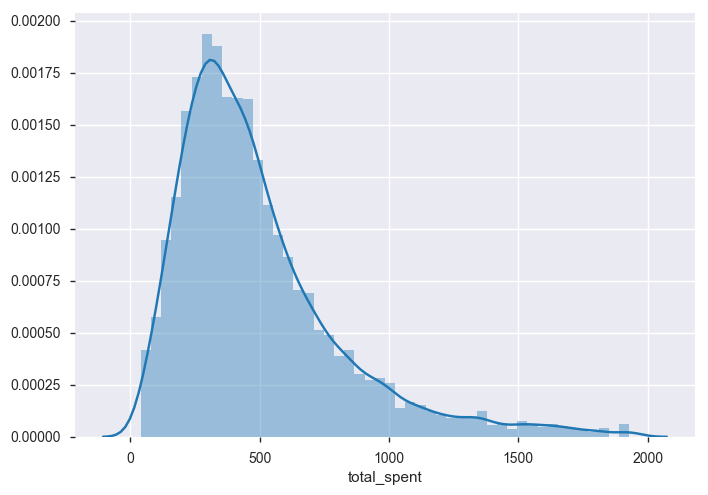

In [58]:
#exploring data
#distribution of variables
import seaborn as sns
sns.distplot(credit_sales_new.total_spent)

In [59]:
credit_sales_new['ln_total_spent']=np.log(credit_sales_new['total_spent']+1)

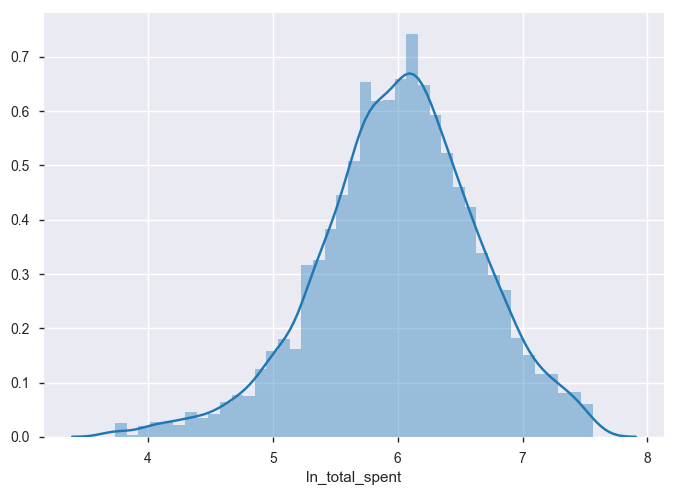

In [60]:
sns.distplot(credit_sales_new.ln_total_spent)

In [61]:
credit_sales_new=credit_sales_new.drop(['total_spent'],axis=1)

In [62]:
credit_sales_new.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'ln_total_spent'],
      dtype='object', length=142)

In [63]:
corr=credit_sales_new.corr()

In [64]:
corr.to_csv('corr.csv')

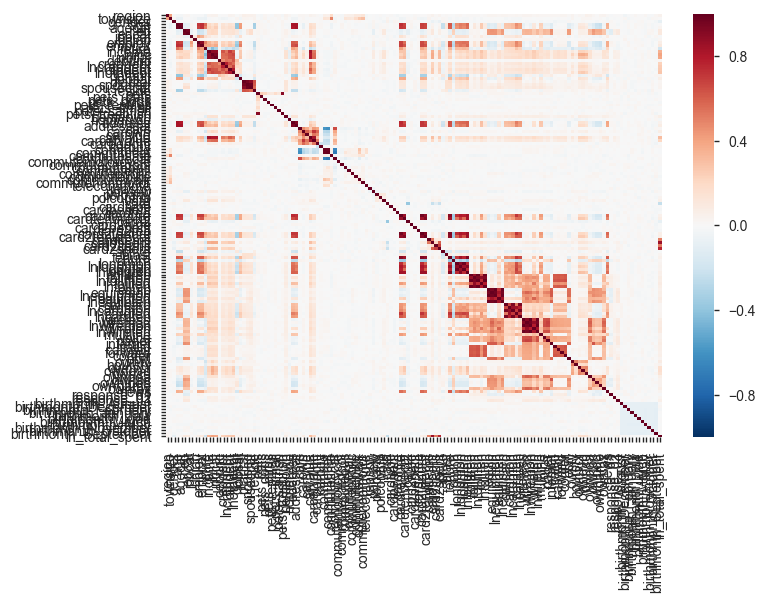

In [65]:
sns.heatmap(credit_sales_new.corr())

In [66]:
#splitting the data
feature_columns=credit_sales_new.columns.difference(['ln_total_spent'])

In [67]:
feature_columns

Index(['active', 'address', 'addresscat', 'age', 'agecat', 'bfast',
       'birthmonth_August', 'birthmonth_December', 'birthmonth_February',
       'birthmonth_January',
       ...
       'tollfree', 'tollmon', 'tollten', 'townsize', 'union', 'voice', 'vote',
       'wireless', 'wiremon', 'wireten'],
      dtype='object', length=141)

In [68]:
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y=train_test_split(credit_sales_new[feature_columns],credit_sales_new['ln_total_spent'],test_size=0.3,random_state=123)

In [69]:
train,test=train_test_split(credit_sales_new,test_size=0.3,random_state=123)

In [70]:
print(len(train_x))

3500


In [71]:
print(len(test_x))

1500


# building a linear regression model


In [72]:
train.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'ln_total_spent'],
      dtype='object', length=142)

In [73]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'ln_total_spent'],
      dtype='object', length=142)

In [74]:
all_columns = "+".join(train.columns.difference( ['ln_total_spent'] ))

print(all_columns)


active+address+addresscat+age+agecat+bfast+birthmonth_August+birthmonth_December+birthmonth_February+birthmonth_January+birthmonth_July+birthmonth_June+birthmonth_March+birthmonth_May+birthmonth_November+birthmonth_October+birthmonth_September+callcard+callid+callwait+carbought+carbuy+carcatvalue+card+card2+card2benefit+card2fee+card2items+card2spent+card2tenure+card2tenurecat+card2type+cardbenefit+cardfee+carditems+cardmon+cardspent+cardten+cardtenure+cardtenurecat+cardtype+carown+cars+cartype+carvalue+churn+commute+commutebike+commutebus+commutecar+commutecarpool+commutecat+commutemotorcycle+commutenonmotor+commutepublic+commuterail+commutetime+commutewalk+confer+creddebt+debtinc+default+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hometype+hourstv+inccat+income+internet+jobcat+jobsat+lncardmon+lncardten+lncreddebt+lnequipmon+lnequipten+lninc+lnlongmon+lnlongten+lnothdebt+lntollmon+lntollten+lnwiremon+lnwireten+longmon+longten+marital+multline+news+othd

In [75]:
my_formula="ln_total_spent~" + all_columns

In [76]:
print(my_formula)

ln_total_spent~active+address+addresscat+age+agecat+bfast+birthmonth_August+birthmonth_December+birthmonth_February+birthmonth_January+birthmonth_July+birthmonth_June+birthmonth_March+birthmonth_May+birthmonth_November+birthmonth_October+birthmonth_September+callcard+callid+callwait+carbought+carbuy+carcatvalue+card+card2+card2benefit+card2fee+card2items+card2spent+card2tenure+card2tenurecat+card2type+cardbenefit+cardfee+carditems+cardmon+cardspent+cardten+cardtenure+cardtenurecat+cardtype+carown+cars+cartype+carvalue+churn+commute+commutebike+commutebus+commutecar+commutecarpool+commutecat+commutemotorcycle+commutenonmotor+commutepublic+commuterail+commutetime+commutewalk+confer+creddebt+debtinc+default+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hometype+hourstv+inccat+income+internet+jobcat+jobsat+lncardmon+lncardten+lncreddebt+lnequipmon+lnequipten+lninc+lnlongmon+lnlongten+lnothdebt+lntollmon+lntollten+lnwiremon+lnwireten+longmon+longten+marital+mul

In [77]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=my_formula,data=train).fit()


In [86]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_total_spent   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 22 May 2018   Prob (F-statistic):               0.00
Time:                        14:16:27   Log-Likelihood:                 383.71
No. Observations:                3500   AIC:                            -483.4
Df Residuals:                    3358   BIC:                             391.4
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.3069      0.103     41.632      0.000       4.104       4.510
active                  -0.0048      0.008     -0.601      0.548      -0.020       0.011
address                  0.0007      0.001      0.701      0.484      -0.001       0.003
addresscat              -0.0146      0.009     -1.569      0.117      -0.033       0.004
age                     -0.0014      0.001     -1.315      0.189      -0.003       0.001
agecat                   0.0196      0.013      1.523      0.128      -0.006       0.045
bfast                    0.0052      0.005      1.081      0.280      -0.004       0.015
birthmonth_August        0.0035      0.019      0.186      0.853      -0.033       0.040
birthmonth_December      0.0030      0.019      0.155      0.877      -0.035       0.041
birthmonth_February     -0.0154      0.019     -0.804      0.422      -0.053       0.022
birthmonth_January       0.0090      0.019      0.474      0.636      -0.028       0.046
birthmonth_July          0.0028      0.019      0.149      0.882      -0.034       0.040
birthmonth_June         -0.0060      0.019     -0.317      0.751      -0.043       0.031
birthmonth_March        -0.0034      0.019     -0.178      0.859      -0.041       0.034
birthmonth_May           0.0026      0.019      0.140      0.888      -0.034       0.039
birthmonth_November     -0.0221      0.019     -1.162      0.245      -0.059       0.015
birthmonth_October       0.0063      0.019      0.332      0.740      -0.031       0.043
birthmonth_September    -0.0169      0.018     -0.922      0.357      -0.053       0.019
callcard                 0.1759      0.057      3.064      0.002       0.063       0.288
callid                  -0.0061      0.011     -0.537      0.591      -0.028       0.016
callwait                 0.0023      0.011      0.209      0.835      -0.020       0.024
carbought               -0.0015      0.008     -0.176      0.860      -0.018       0.015
carbuy                  -0.0057      0.008     -0.690      0.491      -0.022       0.010
carcatvalue             -0.0289      0.010     -2.775      0.006      -0.049      -0.008
card                    -0.0247      0.004     -6.576      0.000      -0.032      -0.017
card2                   -0.0167      0.004     -4.696      0.000      -0.024      -0.010
card2benefit             0.0009      0.003      0.252      0.801      -0.006       0.008
card2fee                 0.0187      0.010      1.910      0.056      -0.000       0.038
card2items               0.0611      0.002     25.216      0.000       0.056       0.066
card2spent               0.0010   5.86e-05     17.237      0.000       0.001       0.001
card2tenure             -0.0007      0.002     -0.280      0.780      -0.005       0.004
card2tenurecat          -0.0019      0.012     -0.159    

In [88]:
test.head(5)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,ln_total_spent
2648,5,5.0,0,22,2,17.0,4,2,0,0.0,...,0,0,0,0,0,0,0,0,1,5.788399
2456,5,5.0,1,42,4,12.0,2,1,0,13.0,...,0,0,0,0,1,0,0,0,0,6.246146
4557,5,1.0,0,70,6,8.0,1,1,1,14.0,...,0,0,0,0,0,1,0,0,0,6.332427
4884,5,5.0,0,18,2,13.0,2,2,0,0.0,...,0,0,0,0,0,0,0,0,0,6.183014
92,5,2.0,0,32,3,14.0,2,1,0,5.0,...,0,1,0,0,0,0,0,0,0,6.197970


In [89]:
test.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'ln_total_spent'],
      dtype='object', length=142)

In [90]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'birthmonth_February', 'birthmonth_January', 'birthmonth_July',
       'birthmonth_June', 'birthmonth_March', 'birthmonth_May',
       'birthmonth_November', 'birthmonth_October', 'birthmonth_September',
       'ln_total_spent'],
      dtype='object', length=142)

In [91]:
test.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,ln_total_spent
2648,5,5.0,0,22,2,17.0,4,2,0,0.0,...,0,0,0,0,0,0,0,0,1,5.788399
2456,5,5.0,1,42,4,12.0,2,1,0,13.0,...,0,0,0,0,1,0,0,0,0,6.246146
4557,5,1.0,0,70,6,8.0,1,1,1,14.0,...,0,0,0,0,0,1,0,0,0,6.332427
4884,5,5.0,0,18,2,13.0,2,2,0,0.0,...,0,0,0,0,0,0,0,0,0,6.183014
92,5,2.0,0,32,3,14.0,2,1,0,5.0,...,0,1,0,0,0,0,0,0,0,6.197970


In [92]:
pred=lm.predict(test)

In [93]:
pred.head()

2648    5.606185
2456    6.344972
4557    6.573771
4884    5.802957
92      6.186770
dtype: float64

ValueError: Found input variables with inconsistent numbers of samples: [19, 1500]

In [97]:
pred=lm.predict(train)

In [98]:
pred.head()

4036    6.315410
2883    5.343754
4162    5.479218
4640    6.114057
2430    8.013014
dtype: float64

In [100]:

print('MAE:', metrics.mean_absolute_error(train.ln_total_spent, pred))
print('MSE:', metrics.mean_squared_error(train.ln_total_spent, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_total_spent, pred)))
print('R-Squre:', metrics.r2_score(train.ln_total_spent, pred))

MAE: 0.162274861878
MSE: 0.0470219297874
RMSE: 0.216845405272
R-Squre: 0.890012527235


In [101]:
np.corrcoef(train.ln_total_spent, pred)

array([[ 1.        ,  0.94340475],
       [ 0.94340475,  1.        ]])

# Feature selection

In [1]:
import statsmodels as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [3]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_total_spent~active+address+addresscat+age+agecat+bfast+birthmonth_August+birthmonth_December+birthmonth_February+birthmonth_January+birthmonth_July+birthmonth_June+birthmonth_March+birthmonth_May+birthmonth_November+birthmonth_October+birthmonth_September+callcard+callid+callwait+carbought+carbuy+carcatvalue+card+card2+card2benefit+card2fee+card2items+card2spent+card2tenure+card2tenurecat+card2type+cardbenefit+cardfee+carditems+cardmon+cardspent+cardten+cardtenure+cardtenurecat+cardtype+carown+cars+cartype+carvalue+churn+commute+commutebike+commutebus+commutecar+commutecarpool+commutecat+commutemotorcycle+commutenonmotor+commutepublic+commuterail+commutetime+commutewalk+confer+creddebt+debtinc+default+ebill+ed+edcat+empcat+employ+equip+equipmon+equipten+forward+gender+homeown+hometype+hourstv+inccat+income+internet+jobcat+jobsat+lncardmon+lncardten+lncreddebt+lnequipmon+lnequipten+lninc+lnlongmon+lnlongten+lnothdebt+lntollmon+lntollten+lnwiremon+lnwireten+longmon+longten+marital+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+pets+pets_birds+pets_cats+pets_dogs+pets_freshfish+pets_reptiles+pets_saltfish+pets_small+polcontrib+polparty+polview+reason+region+reside+response_01+response_02+response_03+retire+spoused+spousedcat+telecommute+tenure+tollfree+tollmon+tollten+townsize+union+voice+vote+wireless+wiremon+wireten'', train, return_type='dataframe')

SyntaxError: invalid syntax (<ipython-input-3-5d7e542046a8>, line 5)

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif.round(3)